In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
folder_path = '../../data'
datasets = [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]

In [3]:
def plot(dataset, ax):
    # Define the desired order of methods
    desired_order = ['mmit', 'aft_xgboost']

    # Load the CSV file
    df = pd.read_csv(f'../../loss_csvs/{dataset}.csv')

    # Filter methods and keep only the desired ones
    df = df[df['method'].isin(desired_order)]

    # Get log of loss
    df['loss'] = np.log10(df['loss'] + 1e-10)

    # Filter methods and ensure the desired order
    df['method'] = pd.Categorical(df['method'], categories=desired_order, ordered=True)
    df = df.sort_values('method')
    methods = desired_order  # Use the desired order

    # Third plot: boxplot showing only the 25-75 percentile box with similar style to second plot
    means = []
    sds = []
    for method in methods:
        method_losses = df[df['method'] == method]['loss']
        ax.scatter(method_losses, [method] * len(method_losses), alpha=0.6, color='white', edgecolors='black')

    ax.set_ylabel('Method')
    ax.set_xlabel('log_test_squared_hinge_loss')
    ax.set_title(f"{dataset}")
    ax.set_ylim(-0.5, len(methods) - 0.5)
    ax.set_yticks(np.arange(len(methods)))  # Ensure y-ticks match the method indices
    ax.set_yticklabels(methods)  # Set y-ticks to be the method names
    ax.grid(True)



def combined_plot(datasets):
    n_datasets = len(datasets)
    n_rows = (n_datasets // 3) + (1 if n_datasets % 3 != 0 else 0)  # Calculate the number of rows needed

    # Create a figure with multiple subplots
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 1.5 * n_rows))

    # Flatten axes for easier iteration if there are multiple rows
    axes = axes.flatten()

    for i, dataset in enumerate(datasets):
        plot(dataset, axes[i])

    # Hide any unused subplots if there are fewer datasets than subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

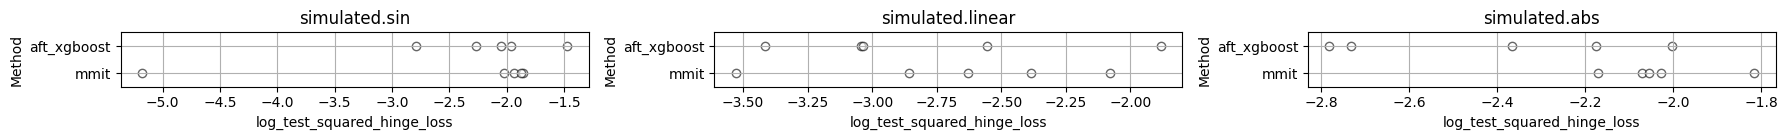

In [5]:
combined_plot(['simulated.sin', 'simulated.linear', 'simulated.abs'])